In [1]:
def kmeans():
    import zipfile
    import pandas as pd
    from sklearn.cluster import KMeans
    from sklearn.feature_extraction.text import TfidfVectorizer
    import glob, os
    
    with zipfile.ZipFile("snowden.zip","r") as zip_ref:
         zip_ref.extractall("snowden")
    
    os.chdir("C:\\Users\\Miya\\OneDrive\\Miya'sGithub\\Big-Data-Course-Projects\snowden")
    file_list = [file for file in glob.glob("*.txt")]
    len(file_list)
    
    
    content_list = []
    
    for file in file_list:
        with open(file, encoding="utf8") as content_file:
            content_list.append(content_file.read())
        
    content_df = pd.DataFrame.from_dict({'content':content_list})
    
    content = content_df.content
    
    
    tfidf_vectorizer = TfidfVectorizer(
    min_df= 2,
    max_df = 85,# min count for relevant vocabulary
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=u'[a-z]+',  # tokenize only words of 4+ chars
    ngram_range=(1, 2),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)
    
    desc_vect = tfidf_vectorizer.fit_transform(content)
    
    
    coo = desc_vect.tocoo(copy = False)
    df_word_matrix = pd.DataFrame({'index': coo.row, 'feature': coo.col, 'data': coo.data}
                 )[['index', 'feature', 'data']].sort_values(['index', 'feature']).reset_index(drop=True)
    word_matrix = df_word_matrix.pivot('index', 'feature', 'data')
    word_matrix = word_matrix.fillna(0)
    
    km = KMeans(n_clusters = 10)
    km.fit(word_matrix)
    clusters = km.labels_.tolist()
    df_ngram= pd.DataFrame({'word': word_matrix.index, 'cluster': clusters})
    df_ngram.groupby('cluster').get_group(1)
    content_list_2 = []
    for i in df_ngram.word:
        content_list_2.append(content[i])
    df_ngram['content'] = content_list_2
    report = df_ngram.groupby('cluster').count()
    print(df_ngram)
    return report

In [2]:
import time

In [3]:
start_time = time.time()
kmeans =  kmeans()
print("--- %s seconds ---" % (time.time() - start_time))

      cluster  word                                            content
0           1     0  RT @UnToldCarlisle: Over 1.3 million people ha...
1           1     1  RT @UnToldCarlisle: Over 1.3 million people ha...
2           1     2  RT @UnToldCarlisle: Over 1.3 million people ha...
3           1     3  RT @UnToldCarlisle: Over 1.3 million people ha...
4           1     4  RT @UnToldCarlisle: Over 1.3 million people ha...
5           1     5  RT @UnToldCarlisle: Over 1.3 million people ha...
6           1     6  RT @UnToldCarlisle: Over 1.3 million people ha...
7           1     7  RT @UnToldCarlisle: Over 1.3 million people ha...
8           1     8  RT @UnToldCarlisle: Over 1.3 million people ha...
9           1     9  RT @UnToldCarlisle: Over 1.3 million people ha...
10          1    10  RT @UnToldCarlisle: Over 1.3 million people ha...
11          3    11  RT @digiphile: .@JesselynRadack on #ThisWeek: ...
12          3    12  RT @digiphile: .@JesselynRadack on #ThisWeek: ...
13    

In [6]:
kmeans

,word,content
cluster,,
0,73,73
1,41,41
2,105,105
3,349,349
4,58,58
5,45,45
6,60,60
7,124,124
8,210,210


In [10]:
kmeans.columns

Index(['word', 'content'], dtype='object')

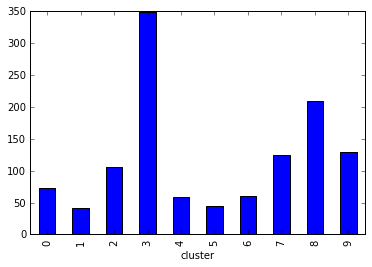

In [18]:
%matplotlib inline
kmeans['word'].plot(kind = 'bar')